This script is used to read the footage data (hd5 format) and transform them to movies (avi format). You need to install opencv python library first by: pip install opencv-contrib-python if you do not have it on your computer.

The frame rate for each movie is 25 Hz and the field of view is around 180°. The image data is stored in BGR format, we put UV intensities in the blue channel, "green" intensities in the green channel and nothing in the red channel.

To better visualize an image in the normal screen, it is suggested to do gamma correction with the function "img_real2view()".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import h5py

In [3]:
#load data
movie_name = "../data/mouse_footage/20180713_13_2.h5"
def read_movie_from_h5(filename):
    h5f = h5py.File(filename,'r')
    movie_bgr_h5=h5f['movie_bgr_real'][:]
    h5f.close()
    return movie_bgr_h5
movie_bgr_h5=read_movie_from_h5(movie_name) 
print (movie_bgr_h5.shape)

(1936, 437, 437, 3)


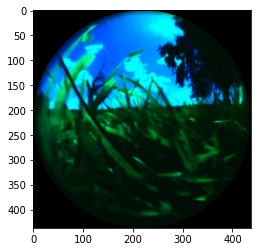

In [4]:
#show one example, image real value
plt.imshow(movie_bgr_h5[1500][...,::-1])

In [5]:
#to better visulaize image, use gamma correction to transfer image real to image view
def img_real2view(img):
    gamma_correction=lambda x:np.power(x,1.0/2.2)
    if np.max(img)>1:
        temp_view=np.zeros_like(img,dtype=np.float32)
        temp_view=np.float32(img)/255.0#1.0
        temp_view=gamma_correction(temp_view)
        temp_view2=np.zeros_like(img,dtype=np.uint8)
        temp_view2=np.uint8(temp_view*255)#255
        return temp_view2
    if np.max(img)<2:
        return gamma_correction(img)

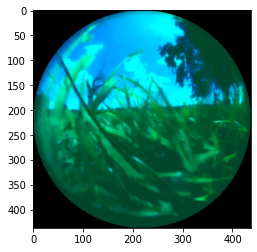

In [6]:
#show one example, image view value
plt.imshow(img_real2view(movie_bgr_h5[1500])[...,::-1])

## save to avi file

In [7]:
radius1=218
side_length=radius1*2+1
width=side_length
height=side_length
fourcc=cv2.VideoWriter_fourcc(*'mjpg')
out=cv2.VideoWriter('video_view.avi',fourcc,25.0,(width,height))
for ii in range(len(movie_bgr_h5)):
    out.write(img_real2view(movie_bgr_h5[ii]))
out.release()